## **Project: Twitter Account Analysis - WeRateDogs** ##

### Table of Contents ###
<ul>
<li><a href="#Project Overview">Project Overview</a></li>
<li><a href="#Data Overview">Data Overview</a></li>
<li><a href="#wrangling1">Data Wrangling - Gather Data</a></li>
<li><a href="#wrangling2">Data Wrangling - Assess Data</a></li>
<li><a href="#wrangling3">Data Wrangling - Clean Data</a></li>
<li><a href="#EDA">Exploratory Data Analysis</a></li>
<li><a href="#Conclusion">Conclusion</a></li>
</ul>

<a id='Project Overview'></a>
### Project Overview ###

**The purpose of this project is to analyze a tweet archive of Twitter user @dog_rates, also known as WeRateDogs. WeRateDogs is a Twitter account that rates people's dogs with a humorous comment about the dog. Tweet data from Twitter's API will be analyzed to determine which dog breed and dog stage, for instance, are the most popular. The data consists of all tweets as of August 1, 2017.**

<a id='Data Overview'></a>
### Data Overview ###

**Data used in this analysis is derived from 3 sources:**
-  **WeRateDogs downloaded their Twitter archive, as of August 1, 2017. This archive contains basic tweet data (tweet   ID, timestamp, text, etc.).** <br>
-  **A .tsv file comprised of tweet image predictions, i.e., what breed of dog (or other object, animal, etc.) is  present in each tweet according to a neural network. This file (image_predictions.tsv) is hosted on Udacity's server.** <br>
-  **Twitter API** <br>

**Each tweet's retweet count and favorite count is extracted using the tweet IDs in the WeRateDogs Twitter archive. Twitter API is queried for each tweet's JSON data using Python's Tweepy library and stored in a .txt file. The .txt read into pandas DataFrame consisting of tweet ID, retweet count, and favorite count.**

<a id='wrangling1'></a>
### Gather Data ###

In [1]:
# Import Libraries for Data Wrangling And Visualizations
import pandas as pd
import numpy as np

import re

import json
import requests

import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from wordcloud import WordCloud

In [2]:
# DataFrame 1 from csv. file 
path = 'twitter-archive-enhanced.csv'
df1 = pd.read_csv(path)

In [3]:
# DataFrame 2 from tsv. file
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r = requests.get(url)

with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

path2 = 'image_predictions.tsv'
df2 = pd.read_csv(path2, sep = '\t')

In [ ]:
# Query Twitter API for each tweet in the Twitter archive and save JSON in a text file
import tweepy
from tweepy import OAuthHandler
from timeit import default_timer as timer

consumer_key = 'INSERT CONSUMER KEY HERE'
consumer_secret = 'INSERT CONSUMER SECRET KEY HERE'
access_token = 'INSERT PERSONAL ACCESS TOKEN HERE'
access_secret = 'INSERT PERSONAL ACCESS SECRET KEY HERE'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)

tweet_ids = df1['tweet_id'].values

# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
i = 0
fails = {}
start = timer()

# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as outfile:
    for tweet_id in tweet_ids:
        i += 1
        print(str(i) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except:
            print("Fail")
            fails[tweet_id] = tweet_id
            pass
end = timer()
print(end - start)
print(fails)

In [4]:
# Pull json data from .txt file and create Pandas DataFrame
tweet_data = [json.loads(line) for line in open('tweet_json.txt', 'r')]
df_list = []

for tweet in tweet_data:
    Created_At = tweet['created_at']
    ID = tweet['id']
    Retweet_Count = tweet['retweet_count']
    Favorite_Count = tweet['favorite_count']
    Retweeted = tweet['retweeted']
    df_list.append({'Created At': Created_At, 'tweet_id': ID, 'Retweet Count': Retweet_Count,
                    'Favorite Count': Favorite_Count, 'Retweeted': Retweeted})

df3 = pd.DataFrame(df_list, columns = ['Created At', 'tweet_id', 'Retweet Count', 'Favorite Count',
                                       'Retweeted'])

In [5]:
# Store original DataFrames before Cleaning
df1_original = df1.copy()
df2_original = df2.copy()
df3_original = df3.copy()

<a id='wrangling2'></a>
### Assess Data ###

In [6]:
df1.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [7]:
df1.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [9]:
# Number of occurances for each rating given to a dog 
df1.rating_numerator.value_counts().head(10)

12    558
11    464
10    461
13    351
9     158
8     102
7      55
14     54
5      37
6      32
Name: rating_numerator, dtype: int64

In [10]:
# Inspect rating numerator of 0 and 15 to determine legitimacy
print(df1[df1['rating_numerator'] == 0]['text'].tolist())
print(df1[df1['rating_numerator'] == 15]['text'].tolist())

["When you're so blinded by your systematic plagiarism that you forget what day it is. 0/10 https://t.co/YbEJPkg4Ag", "PUPDATE: can't see any. Even if I could, I couldn't reach them to pet. 0/10 much disappointment https://t.co/c7WXaB2nqX"]
['RT @KibaDva: I collected all the good dogs!! 15/10 @dog_rates #GoodDogs https://t.co/6UCGFczlOI', '@bragg6of8 @Andy_Pace_ we are still looking for the first 15/10']


In [11]:
# Get count of tweet ID's that don't have denominator of 10.
df1[df1['rating_denominator'] != 10].shape[0]

23

In [12]:
# Inspect 'name' column to determine necessary changes
df1['name'].tolist();

In [13]:
# Inspect 'expanded_url' column to determine necessary changes. Technically this column can be dropped.
df1.expanded_urls.tolist();

#### df1 Assessment ####
**The following items were assessed to be cleaned in the first dataframe:**<br><br>
    **Quality Issues**<br>
    **1.** Delete rows with a rating numerator greater than 14 and value of 0, and replace rating numerator with value specified in text.<br>
    **2.** Convert 'timestamp' column from object to datetime.<br>
    **3.** Delete rows with rating denominator value not equal to 10. We can investigate texts from these rows, but 
since there are only 23 rows out of 2300+ with a non-10 denominator, we'll delete these rows.<br>
    **4.** Some dog names are not capitalized. Capitalize all dog names. Some rows do not specify dog names, search 
           text to identify additional dog names.<br>
    **5.** Dog stages are missing for majority of tweet ID's. Scan text column for dog stage.<br>
    **6.** Rows in the expanded url column have duplicated url's.<br>
    **7.** Convert 'tweet_id' column to object (str).<br>
    **8.** Filter only original tweets. Remove 'RT' rows. <br><br>
    **Tidiness Issues**<br>
    **9.** Doggo, floofer, pupper, puppo columns in twitter_archive_enhanced.csv should be combined into a single column as this is one variable that identify stage of dog. <br><br>
    **Other Issues**<br>
    **10.** Remove the hyperlink and <a/a> tag for url's in the 'source' column.<br>
    **11.** Drop columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', and    'retweeted_status_timestamp'. No valuable information can be extracted from these columns.<br><br>

In [14]:
df2.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [15]:
df2.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [16]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


#### df2 Assessment ####
**The following items were assessed to be cleaned in the second dataframe:**<br><br>
    **Quality Issues**<br>
    **1.** Remove duplicated rows.<br>
    **2.** Convert 'tweet_id' column to object (str). <br>
    **3.** Create separate column for dog breed based on image prediction model results. If first prediction is identified as a dog, than dog breed will equal 'p1', if not, p2 will be evaluated next, and then p3 if necessary.
<br><br>
    **Other Issues**<br>
    **4.** Remove 'jpg_url' and 'img_num' columns - no valuable information.<br>
    **5.** Replace underscore with space for dog breeds. <br><br>

In [17]:
df3.head()

,Created At,tweet_id,Retweet Count,Favorite Count,Retweeted
0,Tue Aug 01 16:23:56 +0000 2017,892420643555336193,8231,37776,False
1,Tue Aug 01 00:17:27 +0000 2017,892177421306343426,6082,32454,False
2,Mon Jul 31 00:18:03 +0000 2017,891815181378084864,4026,24437,False
3,Sun Jul 30 15:58:51 +0000 2017,891689557279858688,8389,41113,False
4,Sat Jul 29 16:00:24 +0000 2017,891327558926688256,9088,39318,False


In [18]:
df3.describe()

,tweet_id,Retweet Count,Favorite Count
count,2.339000e+03,2339.000000,2339.000000
mean,7.421620e+17,2902.441642,7897.909791
std,6.828729e+16,4894.003379,12241.943983
min,6.660209e+17,0.000000,0.000000
25%,6.783378e+17,583.500000,1368.500000
50%,7.186133e+17,1353.000000,3438.000000
75%,7.986907e+17,3383.000000,9675.500000
max,8.924206e+17,82952.000000,163109.000000


In [19]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2339 entries, 0 to 2338
Data columns (total 5 columns):
Created At        2339 non-null object
tweet_id          2339 non-null int64
Retweet Count     2339 non-null int64
Favorite Count    2339 non-null int64
Retweeted         2339 non-null bool
dtypes: bool(1), int64(3), object(1)
memory usage: 75.5+ KB


#### df3 Assessment ####
**The following items were assessed to be cleaned in the third dataframe:**<br><br>
    **Quality Issues**<br>
    **1.** Convert 'Created At' column to DateTime.<br>
    **2.** Convert 'tweet_id' column to object (str). <br><br>
    **Tidiness Issues**<br>
    **3.** Merge critical metrics from all 3 dataframes by 'tweet_id' into one master dataframe.
    

<a id='wrangling3'></a>
### Clean Data ###

#### Clean df1

In [20]:
# Tweet ID to object & Convert 'timestamp' from object to datetime - Code
df1 = pd.read_csv(path)
df1['tweet_id'] = df1['tweet_id'].astype(str)
df1['timestamp'] = pd.to_datetime(df1['timestamp'])

# Test
df1[['tweet_id','timestamp']].dtypes

tweet_id             object
timestamp    datetime64[ns]
dtype: object

In [21]:
# Remove the hyperlink and <a/a> tag for url's in the 'source' column - Code
df1['source'] = df1['source'].str.split('"').str[1] #2356 rows

# Test
df1['source'].head(1)

0    http://twitter.com/download/iphone
Name: source, dtype: object

In [22]:
# Filter out rows with illegitimate rating numerators - Code
df1 = df1.query('rating_numerator <14 and rating_numerator > 0') #2272 rows

# Test
df1.query('rating_numerator >14 and rating_numerator == 0').shape[0]

0

In [23]:
# Replace rating with rating specified in text - Code
wrong_rating_example = df1[df1['tweet_id'] == "883482846933004288"]['rating_numerator']
real_rating = df1.text.str.extract(r'(\d+(?=/))')
real_rating.columns = ['rating']
df1['rating_numerator'] = df1['rating_numerator'].map(real_rating.rating).astype(float)
correct_rating_example = df1[df1['tweet_id'] == "883482846933004288"]['rating_numerator']

# Test
print(wrong_rating_example)
print(correct_rating_example)

45    5
Name: rating_numerator, dtype: int64
45    13.0
Name: rating_numerator, dtype: float64


In [24]:
# Filter rows with rating denominator of 10 - Code
before_denominator = df1.query('rating_denominator != 10').shape[0]
df1['rating_denominator'] = df1.rating_denominator.astype(float)
df1 = df1.query('rating_denominator == 10').reset_index(drop=True) #2265 rows
after_denominator = df1.query('rating_denominator != 10').shape[0]

# Test
print(before_denominator)
print(after_denominator)

7
0


In [25]:
# Remove unnecessary columns from DataFrame - Code
drop_columns = ['in_reply_to_status_id','in_reply_to_user_id','retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp']
df1.drop(drop_columns, axis=1, inplace=True)

# Test
df1.columns.values

array(['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'doggo',
       'floofer', 'pupper', 'puppo'], dtype=object)

In [26]:
# Remove duplicate urls in 'expanded_urls' column - Code
before_dup_url = df1.expanded_urls[4]
df1['expanded_urls'] = df1['expanded_urls'].str.split(',').str[0]
after_dup_url = df1.expanded_urls[4]

# Test
print('Before - ',before_dup_url)
print('After - ',after_dup_url)

Before -  https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1
After -  https://twitter.com/dog_rates/status/891327558926688256/photo/1


In [27]:
# Remove 'RT' rows - Keep original tweets only - Code
drop_retweet = df1.text.str.contains('RT @')
drop_retweet = drop_retweet[drop_retweet == True].index.values
df1 = df1.drop(df1.index[drop_retweet]).reset_index(drop=True); #2098 rows

# Test
df1[df1.text.str.contains('RT @')].shape[0]

0

In [28]:
# Find all lowercase i.e. fake names in df1, search text for real name, and replace identified names in df1 - Code
fake_names = df1[df1.name.str[0]==df1.name.str[0].str.lower()]
fake_names_replace = fake_names.text.str.extract(r'(name is |named )(\w+)').dropna()
fake_names_replace.columns = ['keyword','name']
df1.iloc[fake_names_replace.index, 7] = fake_names_replace.name #22 additional names identified

# Test - List of lowercase (fake) names in df1 before change and an example of the code above.
print(fake_names.name.tolist())
print()
print("Tweet_ID:",fake_names.iloc[0,0],'name was originally',fake_names.iloc[7,7],", now it's",df1.iloc[fake_names_replace.index,7].iloc[0],'.')

['quite', 'quite', 'not', 'incredibly', 'a', 'a', 'very', 'my', 'not', 'his', 'one', 'a', 'a', 'a', 'an', 'very', 'actually', 'a', 'just', 'getting', 'mad', 'very', 'unacceptable', 'all', 'a', 'old', 'a', 'infuriating', 'a', 'a', 'an', 'a', 'a', 'very', 'getting', 'just', 'a', 'the', 'the', 'actually', 'by', 'a', 'officially', 'a', 'the', 'the', 'a', 'a', 'a', 'a', 'life', 'a', 'one', 'a', 'a', 'a', 'light', 'just', 'space', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'an', 'a', 'the', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'a', 'quite', 'a', 'an', 'a', 'the', 'the', 'a', 'a', 'an', 'a', 'a', 'a', 'a']

Tweet_ID: 859196978902773760 name was originally my , now it's Zoey .


In [29]:
# Capitalize all dog names - Code
df1['name'] = df1['name'].str.title()

# Test
df1[df1.name.str[0]==df1.name.str[0].str.lower()].shape[0]

0

In [30]:
# Identify indices that specify multiple dog stages - Code
multiple_stages = (((df1.doggo == 'doggo') & ((df1.floofer == 'floofer') | (df1.pupper == 'pupper') | (df1.puppo == 'puppo'))) | 
         ((df1.floofer == 'floofer') & ((df1.pupper == 'pupper') | (df1.puppo == 'puppo'))) | ((df1.pupper == 'pupper') & (df1.puppo == 'puppo')))
multiple_stages = multiple_stages[multiple_stages == True].index.values

# Test
print(len(multiple_stages),'dogs were identified as multiple dog stages.')

12 dogs were identified as multiple dog stages.


In [31]:
# Write and apply function that creates a 'dog_stage' column to identify dog stage for all tweet id's
def func(dataframe):
    if dataframe['doggo'] == 'doggo' and dataframe['floofer'] == 'floofer':
        return 'doggo, floofer'
    elif dataframe['doggo'] == 'doggo' and dataframe['pupper'] == 'pupper':
        return 'doggo, pupper'
    elif dataframe['doggo'] == 'doggo' and dataframe['puppo'] == 'puppo':
        return 'doggo, puppo'
    elif dataframe['floofer'] == 'floofer':
        return 'floofer'
    elif dataframe['pupper'] == 'pupper':
        return 'pupper'
    elif dataframe['puppo'] == 'puppo':
        return 'puppo'
    else:
        return'None'

df1['dog_stage'] = df1.apply(func, axis=1)

In [32]:
# Verify rows with multiple stages were handled correctly and drop individual dog stage columns - Code
df1 = df1.drop(columns = ['doggo','floofer','puppo','pupper'])

# Test
df1.iloc[multiple_stages,:].head(2)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
145,855851453814013952,2017-04-22 18:31:02,http://twitter.com/download/iphone,Here's a puppo participating in the #ScienceMa...,https://twitter.com/dog_rates/status/855851453...,12.0,10.0,None,"doggo, puppo"
151,854010172552949760,2017-04-17 16:34:26,http://twitter.com/download/iphone,"At first I thought this was a shy doggo, but i...",https://twitter.com/dog_rates/status/854010172...,13.0,10.0,None,"doggo, floofer"


In [33]:
# Scan text column to identify additional dog stages (Only for dog stages that are not already identified) - Code
df_add = df1.query('dog_stage == "None"').reset_index(drop=False)
keywords = ['puppo','doggo','pupper','floofer']
df_add['dog_stage']=df_add.text.str.extract('({})'.format('|'.join(keywords)))
df_add = df_add.dropna(subset=['dog_stage'])
df_add = df_add.filter(['index','dog_stage'], axis=1).set_index('index')

dummy = df_add.copy()
df1.loc[df1.index.isin(dummy.index), ['dog_stage']] = dummy['dog_stage'].values

# Test
print('By scanning text for each ID,', len(df_add), 'additional dog stages were specified.')

By scanning text for each ID, 92 additional dog stages were specified.


In [34]:
# Test - View cleaned df1 DataFrame
df1.head(3)

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage
0,892420643555336193,2017-08-01 16:23:56,http://twitter.com/download/iphone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,12.0,10.0,Phineas,None
1,892177421306343426,2017-08-01 00:17:27,http://twitter.com/download/iphone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,12.0,10.0,Tilly,None
2,891815181378084864,2017-07-31 00:18:03,http://twitter.com/download/iphone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,13.0,10.0,Archie,None


#### Clean df2

In [35]:
df2 = pd.read_csv(path2, sep = '\t') #2075 rows

# Tweet ID to object - Code
df2['tweet_id'] = df2['tweet_id'].astype(str)

# Test
df2['tweet_id'].dtype

dtype('O')

In [36]:
# Drop unnecessary columns and duplicated rows - Code
df2_duplicates = df2[df2.jpg_url.duplicated()].index.values
df2 = df2.drop(df2.index[df2_duplicates]).reset_index(drop=True) #2009 rows
df2.drop(['jpg_url','img_num'], axis=1, inplace=True)

# Test
print('There are',df2.duplicated().sum(),'duplicated rows in df2.')
print('Cleaned df2 columns -',df2.columns.values)

There are 0 duplicated rows in df2.
Cleaned df2 columns - ['tweet_id' 'p1' 'p1_conf' 'p1_dog' 'p2' 'p2_conf' 'p2_dog' 'p3' 'p3_conf'
 'p3_dog']


In [37]:
# Create dog breed column. See Assessment for detail
dogbreed = []
prediction = []
prediction_conf = []
N = len(df2)
for i in range(N):
    if df2['p1_dog'][i] == True:
        breed = df2['p1'][i]
        pred = 'p1'
        conf = df2['p1_conf'][i]
    elif df2['p2_dog'][i] == True:
        breed = df2['p2'][i]
        pred = 'p2'
        conf = df2['p2_conf'][i]
    elif df2['p3_dog'][i] == True:
        breed = df2['p3'][i]
        pred = 'p3'
        conf = df2['p3_conf'][i]
    else:
        breed = 'Not Specified'
        pred = 'Not A Dog'
        conf = df2['p1_conf'][i]
    dogbreed.append(breed)
    prediction.append(pred)
    prediction_conf.append(conf)
df2['dog_breed'] = dogbreed
df2['prediction'] = prediction
df2['confidence'] = prediction_conf

# Remove underscore's from 'dog_breed' column and capitalize dog breeds
df2['dog_breed'] = df2.dog_breed.str.replace('_', ' ')
df2['dog_breed'] = df2['dog_breed'].str.title() 

# Test - View df2 dataframe
df2.head()

,tweet_id,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,dog_breed,prediction,confidence
0,666020888022790149,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True,Welsh Springer Spaniel,p1,0.465074
1,666029285002620928,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True,Redbone,p1,0.506826
2,666033412701032449,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True,German Shepherd,p1,0.596461
3,666044226329800704,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True,Rhodesian Ridgeback,p1,0.408143
4,666049248165822465,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True,Miniature Pinscher,p1,0.560311


#### Clean df3

In [38]:
# Convert 'Created At' column from object to datetime, and 'tweet_id' to object
df3['Created At'] = pd.to_datetime(df3['Created At'])
df3['tweet_id'] = df3['tweet_id'].astype(str)

# Test
df3[['tweet_id','Created At']].dtypes

tweet_id              object
Created At    datetime64[ns]
dtype: object

In [39]:
# Test - View df3 DataFrame
df3.head()

,Created At,tweet_id,Retweet Count,Favorite Count,Retweeted
0,2017-08-01 16:23:56,892420643555336193,8231,37776,False
1,2017-08-01 00:17:27,892177421306343426,6082,32454,False
2,2017-07-31 00:18:03,891815181378084864,4026,24437,False
3,2017-07-30 15:58:51,891689557279858688,8389,41113,False
4,2017-07-29 16:00:24,891327558926688256,9088,39318,False


In [40]:
# Save cleaned DataFrames to .csv's
df1.to_csv('twitter_archive_updated.csv', index = False)
df2.to_csv('image_prediction_results.csv', index = False)
df3.to_csv('twitter_api_data.csv', index = False)

<a id='EDA'></a>
### Exploratory Data Analysis ###

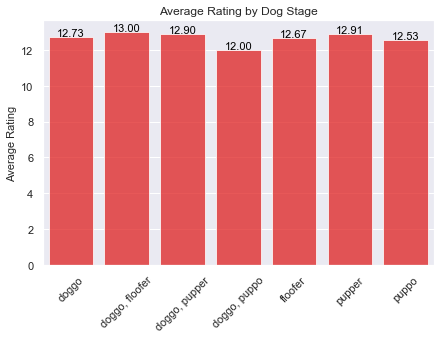

In [41]:
# Plot Average Rating by Dog Breed
stage = df1.query('dog_stage != "None"')
stage = stage.groupby('dog_stage').mean().reset_index()

sns.set()
plt.figure(figsize=(7,4.5))
g = sns.barplot(data = stage, x = 'dog_stage', y = 'rating_numerator', color = 'red', alpha = 0.75)
plt.title('Average Rating by Dog Stage', fontsize = 12)
plt.xticks(rotation=45, fontsize = 11);
plt.xlabel('Dog Stage', fontsize = 11);
plt.ylabel('Average Rating', fontsize = 11);
g.xaxis.label.set_visible(False)

for p in g.patches:
    g.annotate("%.2f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=11, color='black', xytext=(0, 4), textcoords='offset points')

plt.show()

In [42]:
df1.query('dog_stage != "None"').groupby('dog_stage')['rating_numerator'].describe().reset_index(drop=False)

,dog_stage,count,mean,std,min,25%,50%,75%,max
0,doggo,66.0,12.727273,0.448775,12.0,12.0,13.0,13.0,13.0
1,"doggo, floofer",1.0,13.000000,NaN,13.0,13.0,13.0,13.0,13.0
2,"doggo, pupper",10.0,12.900000,0.316228,12.0,13.0,13.0,13.0,13.0
3,"doggo, puppo",1.0,12.000000,NaN,12.0,12.0,12.0,12.0,12.0
4,floofer,9.0,12.666667,0.500000,12.0,12.0,13.0,13.0,13.0
5,pupper,216.0,12.907407,0.290534,12.0,13.0,13.0,13.0,13.0
6,puppo,30.0,12.533333,0.507416,12.0,12.0,13.0,13.0,13.0


Green = p3, Blue = p2, Red = p1


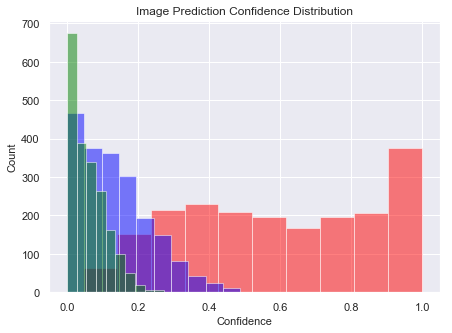

In [43]:
# Plot Confidence Intervals for top 3 predictions from image prediction model
plt.figure(figsize=(7,5));
plt.hist(df2.p1_conf, alpha = 0.5, color='red');
plt.hist(df2.p2_conf, alpha = 0.5, color='blue');
plt.hist(df2.p3_conf, alpha = 0.5, color='green');
plt.title('Image Prediction Confidence Distribution');
plt.ylabel('Count', fontsize = 11);
plt.xlabel('Confidence',fontsize = 11);
print('Green = p3, Blue = p2, Red = p1')

In [44]:
# Count how many times each prediction model was used to identify a dog breed
print(df2['prediction'].value_counts())
print(df2.query('prediction == "p2"')['confidence'].mean())
print(df2.query('prediction == "p3"')['confidence'].mean())

p1           1480
Not A Dog     318
p2            149
p3             62
Name: prediction, dtype: int64
0.11199592553892626
0.050793745372580634


**By assessing the prediction model, we can see that over 200 dog breed identifications were 2nd and 3rd predictions made from the model. Because this comprises of over 10% of the total predictions, this should be accounted for. Below, only predictions with a confidence over 25% will be used to analyze the dataset and make a conclusion.**

In [45]:
# Analyze which dog breeds gathered most retweets and favorites over lifecycle of WeAreDogs account
breed1 = pd.merge(df2, df3, on='tweet_id', how='outer')
breed1 = breed1.query('confidence >= 0.25').groupby('dog_breed')['Retweet Count', 'Favorite Count'].sum().reset_index(drop=False)
Retweet = breed1.sort_values(by = ["Retweet Count"],ascending=False).reset_index(drop=True).drop(index=0).head(10)
Favorite = breed1.sort_values(by = ["Favorite Count"],ascending=False).reset_index(drop=True).drop(index=0).head(10)

In [46]:
# Normalize data to account for dog breed counts
breed2 = pd.merge(df2, df3, on='tweet_id', how='outer')
breed2 = breed2.query('confidence >= 0.25')['dog_breed'].value_counts().reset_index(drop=False).drop(index=0)
breed2 = breed2.rename(columns={'index':'dog_breed','dog_breed':'dog_count'})

breed_final = pd.merge(breed1, breed2, on='dog_breed', how='outer')
breed_final['Retweet Norm'] = breed_final['Retweet Count'] / breed_final['dog_count']
breed_final['Favorite Norm'] = breed_final['Favorite Count'] / breed_final['dog_count']

# Create normalized DataFrames comprised of dog breeds with a dog count (i.e. tweet count) of 3 or higher
Retweet_norm = breed_final.query('dog_count > 2').sort_values(by = ["Retweet Norm"],ascending=False).reset_index(drop=True).head(10)
Favorite_norm = breed_final.query('dog_count > 2').sort_values(by = ["Favorite Norm"],ascending=False).reset_index(drop=True).head(10)

# Filter necessary columns
Retweet_norm = Retweet_norm[['dog_breed','Retweet Norm','Favorite Norm', 'dog_count']]
Favorite_norm = Retweet_norm[['dog_breed','Favorite Norm','Retweet Norm', 'dog_count']]

In [47]:
Retweet

,dog_breed,Retweet Count,Favorite Count
1,Golden Retriever,447797.0,1582711.0
2,Labrador Retriever,341991.0,1066241.0
3,Pembroke,259245.0,944444.0
4,Chihuahua,205961.0,633571.0
5,Samoyed,164261.0,498761.0
6,French Bulldog,115851.0,460616.0
7,Chow,101608.0,368427.0
8,Cocker Spaniel,91586.0,291079.0
9,Eskimo Dog,91193.0,249328.0
10,Pug,90124.0,298913.0


In [48]:
Favorite

,dog_breed,Retweet Count,Favorite Count
1,Golden Retriever,447797.0,1582711.0
2,Labrador Retriever,341991.0,1066241.0
3,Pembroke,259245.0,944444.0
4,Chihuahua,205961.0,633571.0
5,Samoyed,164261.0,498761.0
6,French Bulldog,115851.0,460616.0
7,Chow,101608.0,368427.0
8,Pug,90124.0,298913.0
9,Cocker Spaniel,91586.0,291079.0
10,Pomeranian,88272.0,254465.0


In [49]:
print('There are',(Retweet['dog_breed'].isin(Favorite['dog_breed']).value_counts()[1]),'dog breeds that are in the list of top 10 highest Retweet Count AND Favorite Count, with',Favorite['dog_breed'][1],'not surprisingly, the most popular.')

There are 9 dog breeds that are in the list of top 10 highest Retweet Count AND Favorite Count, with Golden Retriever not surprisingly, the most popular.


In [50]:
Retweet_norm

,dog_breed,Retweet Norm,Favorite Norm,dog_count
0,Standard Poodle,7272.166667,17596.333333,6.0
1,Eskimo Dog,6079.533333,16621.866667,15.0
2,English Springer,5615.555556,14972.555556,9.0
3,Saluki,4805.000000,23083.000000,4.0
4,Mexican Hairless,4522.333333,15277.333333,3.0
5,Cardigan,4430.466667,14968.800000,15.0
6,Great Pyrenees,4398.642857,12271.000000,14.0
7,French Bulldog,4290.777778,17059.851852,27.0
8,Flat-Coated Retriever,4246.875000,16071.000000,8.0
9,Samoyed,4211.820513,12788.743590,39.0


In [51]:
Favorite_norm

,dog_breed,Favorite Norm,Retweet Norm,dog_count
0,Standard Poodle,17596.333333,7272.166667,6.0
1,Eskimo Dog,16621.866667,6079.533333,15.0
2,English Springer,14972.555556,5615.555556,9.0
3,Saluki,23083.000000,4805.000000,4.0
4,Mexican Hairless,15277.333333,4522.333333,3.0
5,Cardigan,14968.800000,4430.466667,15.0
6,Great Pyrenees,12271.000000,4398.642857,14.0
7,French Bulldog,17059.851852,4290.777778,27.0
8,Flat-Coated Retriever,16071.000000,4246.875000,8.0
9,Samoyed,12788.743590,4211.820513,39.0


In [52]:
print('There are',(Retweet_norm['dog_breed'].isin(Favorite_norm['dog_breed']).value_counts()[1]),'dog breeds that are in the list of top 10 highest Retweet Count AND Favorite Count per tweet.')

There are 10 dog breeds that are in the list of top 10 highest Retweet Count AND Favorite Count per tweet.


In [53]:
# Analyze which dog stages are the most popular based on retweet and favorite counts
stages = pd.merge(df1, df3, on='tweet_id', how='right')
stages1 = stages.groupby('dog_stage')['Retweet Count', 'Favorite Count'].sum().reset_index(drop=False)

# Normalize dog stages by taking into account dog count (i.e. tweet counts)
stages2 = stages['dog_stage'].value_counts().reset_index(drop=False)
stages2 = stages2.rename(columns={'index':'dog_stage','dog_stage':'dog_count'})

stages_final = pd.merge(stages1, stages2, on='dog_stage', how='outer').reset_index(drop=True).drop(index=0)
stages_final['Retweet Norm'] = stages_final['Retweet Count'] / stages_final['dog_count']
stages_final['Favorite Norm'] = stages_final['Favorite Count'] / stages_final['dog_count']

# Filter DataFrame by dog counts of 3 or higher
Retweet_norm1 = stages_final.query('dog_count > 2').sort_values(by = ["Retweet Norm"],ascending=False).reset_index(drop=True)

Retweet_norm1 = Retweet_norm1[['dog_stage','Retweet Norm','Favorite Norm', 'dog_count']]

In [54]:
Retweet_norm1

,dog_stage,Retweet Norm,Favorite Norm,dog_count
0,doggo,5658.343284,16084.656716,67
1,puppo,5107.354839,18742.806452,31
2,floofer,3884.444444,10538.444444,9
3,"doggo, pupper",3844.600000,12387.400000,10
4,pupper,2062.098712,6301.004292,233


In [55]:
print("It's evident by Retweet and Favorite averages that",Retweet_norm1['dog_stage'][0],"is the most popular dog stage, followed by",Retweet_norm1['dog_stage'][1],".")

It's evident by Retweet and Favorite averages that doggo is the most popular dog stage, followed by puppo .


In [56]:
df = pd.merge(stages, df2, on = 'tweet_id', how='outer')
df = df[['tweet_id','timestamp','text','rating_numerator','rating_denominator','name','dog_stage','Retweet Count',
         'Favorite Count','dog_breed','prediction','confidence']]
df.to_csv('twitter_archive_master.csv', sep='\t', index = False)

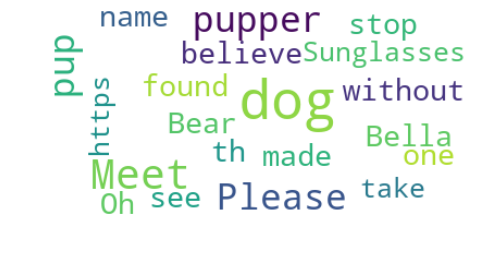

In [57]:
# Generate Word Cloud to observe any potential keywords associated with highest rating.
max_rating = df.rating_numerator.max()
word_cloud_df = df.query("rating_numerator=='{0}'".format(max_rating))
word_cloud_text = word_cloud_df.text

word_cloud = WordCloud(max_font_size=50, max_words=20, background_color="white").generate(str(word_cloud_text))
plt.figure(figsize = (10, 4))
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

<a id='Conclusion'></a>
### Conclusion ###

The datasets used in this analysis provided key insights into the rating system and behavior of the WeRateDogs account on Twitter. 

In the dog stage analysis, 'doggo, puppo' and 'doggo, floofer' have only one value, so these can not be evaluated and compared to the same confidence as the other categories. 'Pupper', with the highest count size of 216, has the highest average rating of the categories with 12.9. 'Puppo', with a count size of 31, has the lowest average ranking of 12.5.

Before evaluating dog_breeds, it was necessary to evaluate the image prediction model itself. Over 200 dog breeds were identified using a p2 or p3 prediction. 'p2' has an average confidence of 11%, while 'p3' has an average confidence of 5%. Because over 10%, a significant amount, of the total data comes from these predictions, the following dog breed analysis was performed for predictions with a **confidence of 25% or higher**. 

The dog breed analysis revealed that the **Golden Retriever** was the most popular dog i.e. received the highest number of retweets and favorites. 9 out of 10 dogs were both on the top Favorite's list as well as the top Retweet's list. These dogs are: Golden Retriever, Labrador Retriever, Pembroke, Chihuahua, Samoyed, French Bulldog, Chow, Cocker Spaniel and the Pug. 

However, it's important to note that Retweet and Favorite counts also reflect the **Number of Tweets**. Without normalizing the data, a fair comparison can't be made. After normalizing the data, it's revealed that the **Standard Poodle** receives the most Retweet's and Favorite's per tweet, 7,272 and 17,596 respectively. In this case, it's also important to consider the possibility of outliers that have counts of 1. Take for instance the scenario where WeAreDogs posts one tweet about a specific dog breed and that tweet goes viral and garners far more retweets and favorites than originally expected. To avoid making inaccurate conclusions, only dog breeds with 'dog_counts' (number of tweets for a dog breed) of greater than 2 are analyzed. 

The following comparison, similar to that of the dog breed, was performed for the dog stages. After normalization, we can conclude that doggo's are the most popular dog stages, with average retweets and favorites per tweet of 5,658 and 16,084 respectively. 

A word cloud was finally generated to identify any keywords that could correlate to high rating. "Sunglasses", "pup", "please", and "call" are some of the top words that are used in tweets with high rating.


### Credit Sources: ###
1. Udacity
2. Stack Overflow